# shotgun

In [1]:
import pandas as pd
import numpy as np
import scipy.io

import matplotlib.pyplot as plt
import seaborn as sns

from upsetplot import generate_counts, UpSet
from matplotlib_venn import venn2, venn2_circles

In [2]:
# Anoxic
sg_an_1 = pd.read_excel('./Shotgun/EbN1_Bz_anoxic_SG_G1.xlsx')
sg_an_2= pd.read_excel("./Shotgun/EbN1_Bz_anoxic_SG_G2.xlsx")
sg_an_3= pd.read_excel("./Shotgun/EbN1_Bz_anoxic_SG_G3.xlsx")
sg_an_4= pd.read_excel("./Shotgun/EbN1_Bz_anoxic_SG_G4.xlsx")

#Oxic
sg_ox_5 = pd.read_excel("./Shotgun/EbN1_Bz_oxic_SG_G5.xlsx")
sg_ox_6= pd.read_excel("./Shotgun/EbN1_Bz_oxic_SG_G6.xlsx")
sg_ox_7= pd.read_excel("./Shotgun/EbN1_Bz_oxic_SG_G7.xlsx")
sg_ox_8= pd.read_excel("./Shotgun/EbN1_Bz_oxic_SG_G8.xlsx")

#### Zero peptides

In [3]:
dfs_dirty = [sg_an_1, sg_an_2, sg_an_3, sg_an_4, sg_ox_5, sg_ox_6, sg_ox_7, sg_ox_8]

In [4]:
 total_zero_peptides = 0  # Initialize the total count
    
for i, df in enumerate(dfs_dirty, start=1):
    zero_peptides_count = len(df[df['#Peptides'] == 0])
    total_zero_peptides += zero_peptides_count

    print(f"grp {i} has {zero_peptides_count} proteins identified by 0 peptide.")
print()
print(f"Total number of proteins identified by 0 peptide: {total_zero_peptides}")

grp 1 has 15 proteins identified by 0 peptide.
grp 2 has 17 proteins identified by 0 peptide.
grp 3 has 13 proteins identified by 0 peptide.
grp 4 has 16 proteins identified by 0 peptide.
grp 5 has 12 proteins identified by 0 peptide.
grp 6 has 5 proteins identified by 0 peptide.
grp 7 has 19 proteins identified by 0 peptide.
grp 8 has 19 proteins identified by 0 peptide.

Total number of proteins identified by 0 peptide: 116


In [5]:
o_anox = sum(len(df[df['#Peptides'] == 0]) for df in dfs_dirty[:4])
o_ox = sum(len(df[df['#Peptides'] == 0]) for df in dfs_dirty[4:])


print(f"Proportion of anoxic proteins identified by 0 peptide: {o_anox / total_zero_peptides:.0%}")
print(f"Proportion of oxic proteins identified by 0 peptide: {o_ox / total_zero_peptides:.0%}")
print()
print(o_anox)
print(o_ox)

Proportion of anoxic proteins identified by 0 peptide: 53%
Proportion of oxic proteins identified by 0 peptide: 47%

61
55


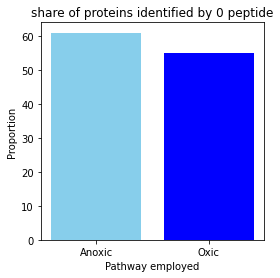

<Figure size 432x288 with 0 Axes>

In [6]:
fig, ax = plt.subplots(figsize = (4,4))
fractions = [o_anox, o_ox]
labels = ['Anoxic', 'Oxic']
col = ['skyblue', 'blue']  # Define colors for the bars

plt.bar(labels, fractions, color=col)# Create a bar plot
plt.xlabel('Pathway employed')# Add labels and a title
plt.ylabel('Proportion')
plt.title('share of proteins identified by 0 peptide')
plt.show();# Display the plot
plt.savefig("share of proteins identified by 0 peptide in sg.pdf");

In [7]:
def oxy_clean_and_filter_dfs(dfs):
    """
    Clean the 'Scores' column in a list of dataframes and filter rows where '#Peptides' is not equal to 0.
    Also, remove trailing spaces from all columns and convert column names to lowercase.

    Args:
        dfs (list of pandas.DataFrame): List of dataframes to process.

    Returns:
        list of pandas.DataFrame: List of processed dataframes.
    """
    processed_dfs = []
    for df in dfs:
        
        # Convert column names to lowercase
        df.columns = df.columns.str.lower()
        
        # Clean the 'Scores' column to remove values within parentheses
        df['scores'] = df['scores'].str.replace(r'\(.*\)', '', regex=True)
        df["scores"] = df["scores"].astype(float)

        # Remove trailing spaces only from columns of type 'object'
        df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

        df = df[df['#peptides'] != 0]   # Remove rows where '#Peptides' is 0

        processed_dfs.append(df)

    return processed_dfs


In [8]:
 dfs = oxy_clean_and_filter_dfs(dfs_dirty) # Reassign processed data to dfs

In [9]:
# Unstack dsf

sg_an_1 = dfs[0]
sg_an_2 = dfs[1]

sg_an_3 = dfs[2]
sg_an_4 = dfs[3]

sg_ox_5 = dfs[4]
sg_ox_6 = dfs[5]

sg_ox_7 = dfs[6]
sg_ox_8 = dfs[7]

In [10]:
sg_an_1.head(3)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00070,EbN1_C00070 hypothetical protein 4890:5297 for...,14.353368,5.899574,27.6,1,9.629630,1,0.108159
1,EbN1_C00640,folD methylenetetrahydrofolate dehydrogenase A...,30.155835,5.992310,32.3,1,7.241379,1,0.312922
2,EbN1_C00970,fum fumarate hydratase 105531:107063 forward M...,54.897228,5.698958,155.7,1,2.745098,1,0.498027


In [11]:
sg_an_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 345
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   accession       331 non-null    object 
 1   protein         331 non-null    object 
 2   mw [kda]        331 non-null    float64
 3   pi              331 non-null    float64
 4   scores          331 non-null    float64
 5   #peptides       331 non-null    int64  
 6   sc [%]          331 non-null    float64
 7   #alt. proteins  331 non-null    int64  
 8   rms [da]        331 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 25.9+ KB


In [12]:
sg_an_2.head(3)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00040,pilA1 Major pilin 2251:2685 reverse MW:14410,14.401434,4.566814,26.2,1,9.722222,1,0.507676
1,EbN1_C00080,"EbN1_C00080 Conserved hypothetical protein, DU...",31.174752,4.880996,44.8,1,4.609929,1,0.039326
2,EbN1_C00640,folD methylenetetrahydrofolate dehydrogenase A...,30.155835,5.992310,101.3,1,6.551724,1,0.147110


In [13]:
sg_an_3.head(3)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00650,"iorB indolepyruvate ferredoxin oxidoreductase,...",21.539254,5.652840,63.7,1,5.365854,1,0.069805
1,EbN1_C00970,fum fumarate hydratase 105531:107063 forward M...,54.897228,5.698958,93.5,1,1.764706,1,0.010622
2,EbN1_C02860,EbN1_C02860 Conserved hypothetical protein 313...,11.750989,7.911397,27.7,1,17.431193,1,0.055820


In [14]:
sg_an_4.head(3)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00720,lpdA dihydrolipoyl dehydrogenase (E3) 71979:73...,63.941007,5.497412,28.3,1,1.951220,1,0.020809
1,EbN1_C01050,"norQ nitric oxide reductase, accessory protein...",28.809828,5.212883,70.9,2,13.636364,1,0.035494
2,EbN1_C02860,EbN1_C02860 Conserved hypothetical protein 313...,11.750989,7.911397,37.4,1,17.431193,1,0.263820


In [15]:
sg_ox_5.head(3)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00710,aceF dihydrolipoyllysine-residue acetyltransfe...,59.968342,4.997646,57.3,1,1.372213,1,0.081766
1,EbN1_C00720,lpdA dihydrolipoyl dehydrogenase (E3) 71979:73...,63.941007,5.497412,49.0,1,3.902439,1,0.002349
2,EbN1_C00970,fum fumarate hydratase 105531:107063 forward M...,54.897228,5.698958,30.6,1,2.352941,1,0.089689


In [16]:
sg_ox_6.head(3)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00970,fum fumarate hydratase 105531:107063 forward M...,54.897228,5.698958,57.9,1,1.764706,1,0.048622
2,EbN1_C03890,"hbrD benzoyl-CoA reductase, subunit D 425856:4...",27.895108,4.760714,81.1,2,7.865169,1,0.036638
3,EbN1_C04060,EbN1_C04060 hypothetical protein 439693:440166...,17.353112,5.071966,69.7,1,10.191083,1,0.056453


In [17]:
sg_ox_7.head(3)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00040,pilA1 Major pilin 2251:2685 reverse MW:14410,14.401434,4.566814,51.5,1,9.722222,1,0.028324
1,EbN1_C00640,folD methylenetetrahydrofolate dehydrogenase A...,30.155835,5.992310,110.6,1,6.551724,1,0.518890
2,EbN1_C00710,aceF dihydrolipoyllysine-residue acetyltransfe...,59.968342,4.997646,52.5,1,1.715266,1,0.004938


In [18]:
sg_ox_8.head(3)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00040,pilA1 Major pilin 2251:2685 reverse MW:14410,14.401434,4.566814,118.7,2,29.166667,1,0.324821
1,EbN1_C00080,"EbN1_C00080 Conserved hypothetical protein, DU...",31.174752,4.880996,48.6,1,4.609929,1,0.041326
2,EbN1_C00640,folD methylenetetrahydrofolate dehydrogenase A...,30.155835,5.992310,85.1,2,11.724138,1,0.049014


In [19]:
for i, df in enumerate(dfs, start=1):
    df_len = len(df)
    print(f"grp {i} contain {df_len} proteins")
    
print()
total_len_anox = sum(len(df) for df in dfs[:4])
print("Total protein anoxic:", total_len_anox)

total_len_ox = sum(len(df) for df in dfs[4:])
print("Total protein oxic:", total_len_ox)

grp 1 contain 331 proteins
grp 2 contain 365 proteins
grp 3 contain 193 proteins
grp 4 contain 342 proteins
grp 5 contain 274 proteins
grp 6 contain 113 proteins
grp 7 contain 309 proteins
grp 8 contain 361 proteins

Total protein anoxic: 1231
Total protein oxic: 1057


### Make total protein bucket

   ### Concatenate 
  #### Anoxic

+ Anoxic dataframes are contatenated row wise (axis = 0) to generate a vertical stacking of all dfs in anoxic. The number of columns remain the same but the rows increases and is re-indexed.
* Next, calculate the count of each protein.. this tells us in how many sample (of 4 replicates) the protein is present.* 
* we select cases where proteins appear in at least 3 replicates
* Repeat process for oxic replicates

In [20]:
all_prot_anox_df = pd.concat(dfs[:4], ignore_index=True)

cnt_per_prot = all_prot_anox_df["accession"].value_counts()

bv = cnt_per_prot[cnt_per_prot >= 3]         # filter for proteins present in at least 3 replicates
bv_idx = bv.index

print(len(all_prot_anox_df))
print(len(cnt_per_prot))
print(len(bv))
print()
print(bv[:2])

1231
492
254

EbN1_C30390    4
EbN1_C28850    4
Name: accession, dtype: int64


In [21]:
bv_filt_df = all_prot_anox_df[all_prot_anox_df['accession'].isin(bv_idx)]  

# Filter all_prot_anox_df based on bv.index

print(len(bv_filt_df))
print()
print(bv_filt_df.nunique())
print()
bv_filt_df.head(2)

902

accession         254
protein           254
mw [kda]          254
pi                254
scores            805
#peptides          28
sc [%]            725
#alt. proteins      2
rms [da]          902
dtype: int64



,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
2,EbN1_C00970,fum fumarate hydratase 105531:107063 forward M...,54.897228,5.698958,155.7,1,2.745098,1,0.498027
4,EbN1_C01050,"norQ nitric oxide reductase, accessory protein...",28.809828,5.212883,75.0,1,3.787879,1,0.027659


In [22]:
cols_view = ['scores', '#peptides', 'sc [%]', '#alt. proteins', 'rms [da]'] # Columns to find maximum values
bv_filt_df.groupby('accession')[cols_view].value_counts() # just curious to see what's there 😂

accession     scores  #peptides  sc [%]     #alt. proteins  rms [da]
EbN1_C00970   93.5    1          1.764706   1               0.010622    1
              155.7   1          2.745098   1               0.498027    1
              191.2   4          7.843137   1               0.205487    1
EbN1_C01050   70.9    2          13.636364  1               0.035494    1
              75.0    1          3.787879   1               0.027659    1
                                                                       ..
EbN1_PI02260  127.8   2          11.557789  1               0.062699    1
EbN1_PI02280  30.3    1          7.853403   1               0.002656    1
              165.3   2          13.612565  1               0.063725    1
              165.5   3          25.130890  1               0.029419    1
              180.8   3          26.178010  1               0.071290    1
Length: 902, dtype: int64

In [23]:
# Group, Aggregate, and Create the Final DataFrame
sg_anox_df = bv_filt_df.groupby('accession').max().reset_index()
sg_anox_df.head()

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00970,fum fumarate hydratase 105531:107063 forward M...,54.897228,5.698958,191.2,4,7.843137,1,0.498027
1,EbN1_C01050,"norQ nitric oxide reductase, accessory protein...",28.809828,5.212883,96.4,2,13.636364,1,0.035494
2,EbN1_C03060,EbN1_C03060 hypothetical protein 333012:334082...,38.018571,4.765166,139.4,3,7.865169,1,0.335329
3,EbN1_C03100,"EbN1_C03100 Conserved hypothetical protein, do...",32.307639,9.112105,133.6,3,10.847458,1,0.057819
4,EbN1_C03400,ask aspartate kinase 372326:373549 reverse MW:...,43.586943,5.417323,165.4,3,6.879607,1,0.043565


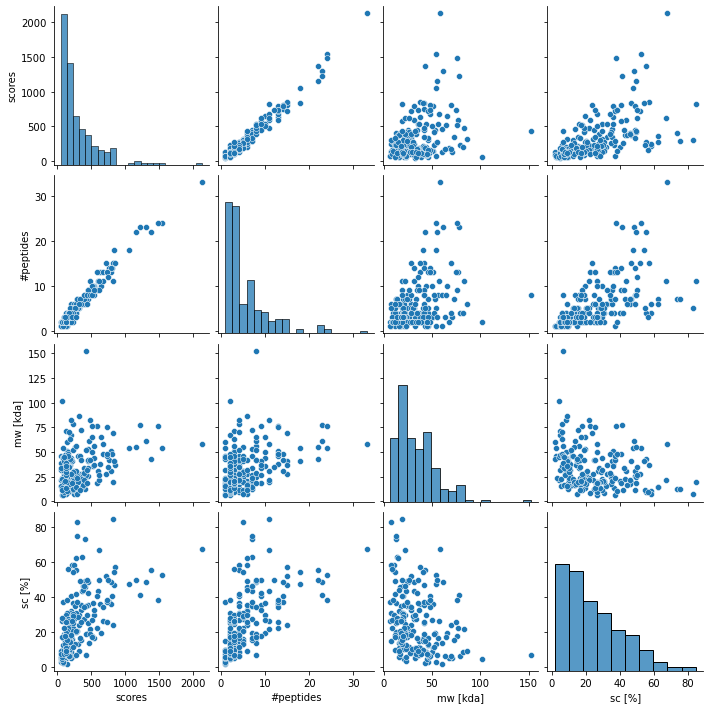

In [82]:
sns.pairplot(data=sg_ox_df, vars=['scores', '#peptides', 'mw [kda]', 'sc [%]'])


  ### Oxic


In [24]:
all_prot_ox_df = pd.concat(dfs[4:], ignore_index=True)

cnt_prot = all_prot_ox_df["accession"].value_counts()

bv_ox = cnt_prot[cnt_prot >= 3]         # filter for proteins present in at least 3 replicates
bvox = bv_ox.index

print(len(all_prot_ox_df))
print(len(cnt_prot))
print(len(bv_ox))
print()
print(bv_ox[:2])

1057
467
211

EbN1_C38530    4
EbN1_C21650    4
Name: accession, dtype: int64


In [25]:
bv_filt = all_prot_ox_df[all_prot_ox_df['accession'].isin(bvox)]  # Filter all_prot_anox_df based on bv.index

print(len(bv_filt))
print()
print(bv_filt.nunique())
print()
bv_filt.head(2)

716

accession         211
protein           211
mw [kda]          211
pi                211
scores            654
#peptides          25
sc [%]            609
#alt. proteins      3
rms [da]          716
dtype: int64



,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00710,aceF dihydrolipoyllysine-residue acetyltransfe...,59.968342,4.997646,57.3,1,1.372213,1,0.081766
4,EbN1_C03400,ask aspartate kinase 372326:373549 reverse MW:...,43.586943,5.417323,25.3,1,2.211302,1,0.064719


In [26]:
# Group, Aggregate, and Create the Final DataFrame
sg_ox_df = bv_filt.groupby('accession').max().reset_index()
sg_ox_df.head()

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00710,aceF dihydrolipoyllysine-residue acetyltransfe...,59.968342,4.997646,136.3,1,1.715266,1,0.081766
1,EbN1_C03400,ask aspartate kinase 372326:373549 reverse MW:...,43.586943,5.417323,196.3,4,8.599509,1,0.064719
2,EbN1_C03890,"hbrD benzoyl-CoA reductase, subunit D 425856:4...",27.895108,4.760714,100.2,2,7.865169,1,0.333720
3,EbN1_C04090,EbN1_C04090 hypothetical protein 442431:442805...,13.097647,5.102867,230.0,4,36.290323,1,0.324099
4,EbN1_C04110,dapA 4-hydroxy-tetrahydrodipicolinate synthase...,31.047095,5.185144,239.9,5,27.397260,1,0.252298


In [27]:
print(len(sg_anox_df)),
print(len(sg_ox_df))

254
211


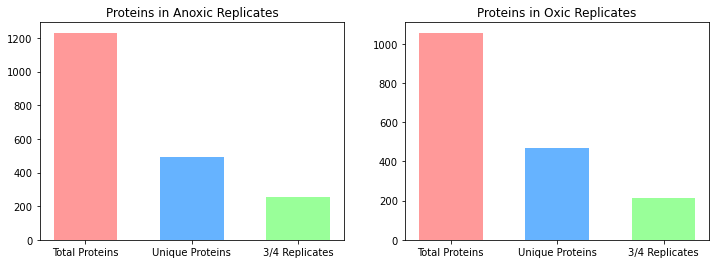

<Figure size 432x288 with 0 Axes>

In [28]:
label_anox = ['Total Proteins', 'Unique Proteins', '3/4 Replicates']
label_ox = ['Total Proteins', 'Unique Proteins', '3/4 Replicates']

sizes_anox = [len(all_prot_anox_df), len(cnt_per_prot), len(bv)]
sizes_ox = [len(all_prot_ox_df), len(cnt_prot), len(bv_ox)]


colors = ['#ff9999', '#66b3ff', '#99ff99']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))          # Create a figure with two subplots


ax[0].bar(label_anox, sizes_anox, color=colors, width = 0.6)                # Create a bar chart for the second subplot (axes[1])
ax[0].set_title("Proteins in Anoxic Replicates")

ax[1].bar(label_ox, sizes_ox, color=colors, width = 0.6)                # Create a bar chart for the second subplot (axes[1])
ax[1].set_title("Proteins in Oxic Replicates")

plt.show()
plt.savefig("Protein_Composition_in_Replicates.png")



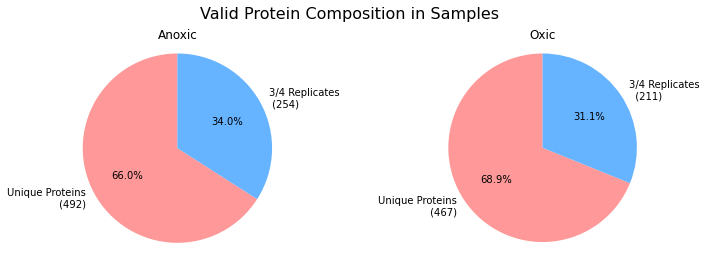

<Figure size 432x288 with 0 Axes>

In [29]:
label_anox = [ 'Unique Proteins\n (492)', '3/4 Replicates\n (254)']
label_ox = ['Unique Proteins\n (467)', '3/4 Replicates\n  (211)']

sizes_anox = [len(cnt_per_prot), len(bv)]
sizes_ox = [len(cnt_prot), len(bv_ox)]


colors = ['#ff9999', '#66b3ff', '#99ff99']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))          # Create a figure with two subplots


ax[0].pie(sizes_anox, labels=label_anox, autopct='%1.1f%%', startangle=90, colors=colors) # Create a pie chart for the first subplot (axes[0])
ax[0].axis('equal')
ax[0].set_title("Anoxic")

ax[1].pie(sizes_ox, labels=label_ox, autopct='%1.1f%%', startangle=90, colors=colors)  # Create a pie chart for the first subplot (axes[0])
ax[1].axis('equal')
ax[1].set_title("Oxic")

plt.suptitle("Valid Protein Composition in Samples", y=0.98, fontsize=16)

# Move the title to the top of the figure
plt.subplots_adjust(top=0.85)

# Save the figure before showing it
plt.show()
plt.savefig("Protein_Composition_in_Samples.png")

### Filter First 10 rows, compare and determine their function

In [30]:
sg_anox_sorted = sg_anox_df.sort_values(by=["scores","#peptides","sc [%]"], ascending=False)

sg_ox_sorted = sg_ox_df.sort_values(by=["scores","#peptides","sc [%]"], ascending=False)

In [31]:
first_10_anox = sg_anox_sorted.iloc[:10]
first_10_anox[:]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
36,EbN1_C06380,groEL chaperonin ATPase (60 kDa subunit) 69206...,58.002240,4.920473,2157.4,29,56.727273,1,0.067083
13,EbN1_C04870,nirS nitrite reductase (NO-forming) 521065:522...,63.928540,7.792005,1682.2,29,52.768166,1,0.143891
9,EbN1_C04380,glcB malate synthase G 472271:474448 forward M...,78.682047,5.860935,1478.2,24,42.620690,1,0.140728
5,EbN1_C03880,"hbrA benzoyl-CoA reductase, subunit A 424905:4...",32.490308,5.697525,1354.9,21,62.706271,1,0.075645
103,EbN1_C21650,tuf1 elongation factor Tu 2243032:2244222 forw...,43.177160,5.319395,1196.0,17,54.040404,1,0.095072
82,EbN1_C17090,"atpA F1-ATP synthase, alpha subunit 1794206:17...",55.501991,5.693926,1194.2,22,46.875000,1,0.112764
183,EbN1_C30310,"bcrC benzoyl-CoA reductase, subunit C 3135683:...",43.497624,5.376631,1182.7,22,63.324538,2,0.108755
137,EbN1_C25580,"aceA glyoxylate bypass, isocitrate lyase 26529...",47.673757,5.708122,1172.7,22,42.956120,1,0.053564
184,EbN1_C30320,"bcrB benzoyl-CoA reductase, subunit B 3136851:...",49.822561,5.811562,1140.0,19,47.004608,1,0.121204
220,EbN1_C36360,"narG nitrate reductase, alpha subunit 3721290:...",140.476954,6.485738,1044.7,21,19.904077,1,0.105412


In [32]:
first_10_ox = sg_ox_sorted.head(10)
first_10_ox[:]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
24,EbN1_C06380,groEL chaperonin ATPase (60 kDa subunit) 69206...,58.002240,4.920473,2127.1,33,67.454545,1,0.082440
62,EbN1_C15680,"boxB benzoyl-CoA 2,3-epoxidase, beta subunit 1...",54.333900,5.552791,1540.0,24,52.431290,1,0.067406
162,EbN1_C30640,"fiu Catecholate siderophore receptor, TonB-dep...",76.378178,5.255412,1484.9,24,38.000000,1,0.151144
85,EbN1_C21650,tuf1 elongation factor Tu 2243032:2244222 forw...,43.177160,5.319395,1374.3,22,55.303030,1,0.123515
61,EbN1_C15670,"boxC 2,3-epoxybenzoyl-CoA dihydrolase 1643583:...",61.179248,5.136635,1302.2,23,48.473968,1,0.124765
92,EbN1_C21760,"fusA2 elongation factor G (EF-2/EF-G), translo...",77.491286,5.276345,1220.4,23,41.117479,1,0.116578
69,EbN1_C17090,"atpA F1-ATP synthase, alpha subunit 1794206:17...",55.501991,5.693926,1158.4,22,49.414062,1,0.070418
60,EbN1_C15650,"boxD 3,4-dehydroadipyl-CoA semialdehyde dehydr...",54.473268,5.912150,1057.5,18,47.428571,1,0.157417
146,EbN1_C28240,"futA ABC transporter, periplasmic solute-bindi...",37.050188,8.990315,853.1,15,57.227139,1,0.153138
31,EbN1_C06930,"sucC succinate-CoA ligase (ADP-forming), beta ...",41.168435,5.091188,837.9,15,46.632124,1,0.224992


### pathway function determination

* we read the file (.xlxs) for lopcalization
* check the functions of the first 10 proteins in both anoxic and oxic respectively
* Analyse output

In [33]:
function = pd.read_excel('EbN1_protein_localization.xlsx')
function.head()

,locustag,Locus,gene,annotation,Localization
0,EbN1_C00010,ebB253,ydaS,"Toxin/antitoxin system, antitoxin, lambda repr...",Unknown
1,EbN1_C00020,ebA2,ebA2,"putative repressor, LexA-like, phage-related",Cytoplasmic
2,EbN1_C00030,ebA5,ebA5,hypothetical protein,Cytoplasmic
3,EbN1_C00040,ebA6,pilA1,Major pilin,Extracellular
4,EbN1_C00050,ebA7,ebA7,"Conserved hypothetical protein, Sel1-like repeat",Cytoplasmic


* make a list of the first_10_anox accession column
* check the elements in the list that matches to locustag column in function df
* view

In [34]:
accessions_to_keep = first_10_anox["accession"].tolist()

# Filter rows in locustag column in function df based on "accession"
anox_func_10 = function[function["locustag"].isin(accessions_to_keep)]
anox_func_10[:3]

,locustag,Locus,gene,annotation,Localization
387,EbN1_C03880,ebA742,hbrA,"3-hydroxybenzoate degradation (anaerobic), ben...",Cytoplasmic
437,EbN1_C04380,ebA819,glcB,"Central carbon metabolism, glyoxylate bypass, ...",Cytoplasmic
486,EbN1_C04870,ebA888,nirS,nitrite reductase (NO-forming),Periplasmic


In [35]:
accessions_to_keep_ox = first_10_ox["accession"].tolist()

# Filter rows in locustag column in function df based on "accession"
ox_func_10 = function[function["locustag"].isin(accessions_to_keep_ox)]
ox_func_10[:3]

,locustag,Locus,gene,annotation,Localization
637,EbN1_C06380,ebA1185,groEL,"chaperonin ATPase (60 kDa subunit), catalyzes ...",Cytoplasmic
692,EbN1_C06930,ebA1272,sucC,"Central carbon metabolism, TCA cycle, succinat...",Cytoplasmic
1564,EbN1_C15650,ebA2759,boxD,"benzoate degradation (aerobic), 3,4-dehydroadi...",Cytoplasmic


### Important proteins common to both conditions.
* This are proteins that are required for both oxic and anoxic benzoate metabolism

In [36]:
cmon_most_important = first_10_anox[first_10_anox["accession"].isin(accessions_to_keep_ox)]
cmon_most_important

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
36,EbN1_C06380,groEL chaperonin ATPase (60 kDa subunit) 69206...,58.002240,4.920473,2157.4,29,56.727273,1,0.067083
103,EbN1_C21650,tuf1 elongation factor Tu 2243032:2244222 forw...,43.177160,5.319395,1196.0,17,54.040404,1,0.095072
82,EbN1_C17090,"atpA F1-ATP synthase, alpha subunit 1794206:17...",55.501991,5.693926,1194.2,22,46.875000,1,0.112764


### proteins that are unique and most important for anaerobic respiration

In [37]:
cmon_most_important = first_10_anox[~first_10_anox["accession"].isin(accessions_to_keep_ox)]
cmon_most_important

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
13,EbN1_C04870,nirS nitrite reductase (NO-forming) 521065:522...,63.928540,7.792005,1682.2,29,52.768166,1,0.143891
9,EbN1_C04380,glcB malate synthase G 472271:474448 forward M...,78.682047,5.860935,1478.2,24,42.620690,1,0.140728
5,EbN1_C03880,"hbrA benzoyl-CoA reductase, subunit A 424905:4...",32.490308,5.697525,1354.9,21,62.706271,1,0.075645
183,EbN1_C30310,"bcrC benzoyl-CoA reductase, subunit C 3135683:...",43.497624,5.376631,1182.7,22,63.324538,2,0.108755
137,EbN1_C25580,"aceA glyoxylate bypass, isocitrate lyase 26529...",47.673757,5.708122,1172.7,22,42.956120,1,0.053564
184,EbN1_C30320,"bcrB benzoyl-CoA reductase, subunit B 3136851:...",49.822561,5.811562,1140.0,19,47.004608,1,0.121204
220,EbN1_C36360,"narG nitrate reductase, alpha subunit 3721290:...",140.476954,6.485738,1044.7,21,19.904077,1,0.105412


### proteins that are unique and most important for aerobic respiration

In [38]:
first_10_ox[~first_10_ox["accession"].isin(accessions_to_keep)]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
62,EbN1_C15680,"boxB benzoyl-CoA 2,3-epoxidase, beta subunit 1...",54.333900,5.552791,1540.0,24,52.431290,1,0.067406
162,EbN1_C30640,"fiu Catecholate siderophore receptor, TonB-dep...",76.378178,5.255412,1484.9,24,38.000000,1,0.151144
61,EbN1_C15670,"boxC 2,3-epoxybenzoyl-CoA dihydrolase 1643583:...",61.179248,5.136635,1302.2,23,48.473968,1,0.124765
92,EbN1_C21760,"fusA2 elongation factor G (EF-2/EF-G), translo...",77.491286,5.276345,1220.4,23,41.117479,1,0.116578
60,EbN1_C15650,"boxD 3,4-dehydroadipyl-CoA semialdehyde dehydr...",54.473268,5.912150,1057.5,18,47.428571,1,0.157417
146,EbN1_C28240,"futA ABC transporter, periplasmic solute-bindi...",37.050188,8.990315,853.1,15,57.227139,1,0.153138
31,EbN1_C06930,"sucC succinate-CoA ligase (ADP-forming), beta ...",41.168435,5.091188,837.9,15,46.632124,1,0.224992


### Specific and Shared Proteins

### Shared

In [39]:
# Find common proteins

cmon_prots = sg_anox_df.merge(sg_ox_df, on="accession", how="inner")

print(cmon_prots.shape) 
cmon_prots.head(3)


(158, 17)


,accession,protein_x,mw [kda]_x,pi_x,scores_x,#peptides_x,sc [%]_x,#alt. proteins_x,rms [da]_x,protein_y,mw [kda]_y,pi_y,scores_y,#peptides_y,sc [%]_y,#alt. proteins_y,rms [da]_y
0,EbN1_C03400,ask aspartate kinase 372326:373549 reverse MW:...,43.586943,5.417323,165.4,3,6.879607,1,0.043565,ask aspartate kinase 372326:373549 reverse MW:...,43.586943,5.417323,196.3,4,8.599509,1,0.064719
1,EbN1_C03890,"hbrD benzoyl-CoA reductase, subunit D 425856:4...",27.895108,4.760714,1011.7,15,55.805243,1,0.087586,"hbrD benzoyl-CoA reductase, subunit D 425856:4...",27.895108,4.760714,100.2,2,7.865169,1,0.333720
2,EbN1_C04110,dapA 4-hydroxy-tetrahydrodipicolinate synthase...,31.047095,5.185144,214.3,5,19.520548,1,0.300577,dapA 4-hydroxy-tetrahydrodipicolinate synthase...,31.047095,5.185144,239.9,5,27.397260,1,0.252298


In [40]:
prot_of_interest = cmon_prots.iloc[[1] + list(range(41, 45)), [0,1,4,5,12,13]]
prot_of_interest

,accession,protein_x,scores_x,#peptides_x,scores_y,#peptides_y
1,EbN1_C03890,"hbrD benzoyl-CoA reductase, subunit D 425856:4...",1011.7,15,100.2,2
41,EbN1_C15650,"boxD 3,4-dehydroadipyl-CoA semialdehyde dehydr...",286.9,6,1057.5,18
42,EbN1_C15670,"boxC 2,3-epoxybenzoyl-CoA dihydrolase 1643583:...",541.3,11,1302.2,23
43,EbN1_C15680,"boxB benzoyl-CoA 2,3-epoxidase, beta subunit 1...",589.0,12,1540.0,24
44,EbN1_C15700,boxE 3-oxoadipyl-CoA thiolase 1648069:1649277 ...,216.1,4,755.3,14


In [41]:
anox_pep = prot_of_interest['#peptides_x'].values
ox_pep = prot_of_interest['#peptides_y'].values

anox_scr = prot_of_interest['scores_x'].values
ox_scr = prot_of_interest['scores_y'].values

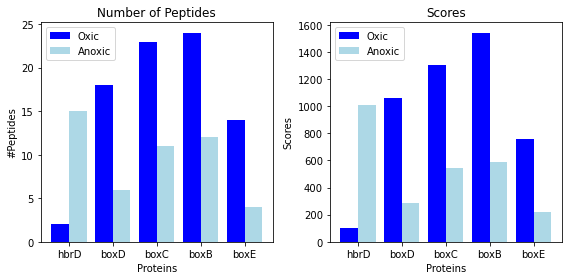

<Figure size 432x288 with 0 Axes>

In [42]:
prot_list = ["hbrD", "boxD", "boxC", "boxB", "boxE"]

data_peptides_oxic = ox_pep
data_peptides_anoxic = anox_pep

data_scores_oxic = ox_scr
data_scores_anoxic = anox_scr

# Create subplots with two axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Set the bar width
bar_width = 0.4

# Define the x-axis positions for bars
x = np.arange(len(prot_list))

# Define the colors
color_oxic = 'blue'
color_anoxic = 'lightblue'  # You can also use 'skyblue' here

# Plot #Peptides on the first axis
ax1.bar(x - bar_width/2, data_peptides_oxic, bar_width, label='Oxic', color=color_oxic, align='center')
ax1.bar(x + bar_width/2, data_peptides_anoxic, bar_width, label='Anoxic', color=color_anoxic, align='center')
ax1.set_xticks(x)
ax1.set_xticklabels(prot_list)
ax1.set_xlabel('Proteins')
ax1.set_ylabel('#Peptides')
ax1.set_title('Number of Peptides')
ax1.legend()

# Plot Scores on the second axis
ax2.bar(x - bar_width/2, data_scores_oxic, bar_width, label='Oxic', color=color_oxic, align='center')
ax2.bar(x + bar_width/2, data_scores_anoxic, bar_width, label='Anoxic', color=color_anoxic, align='center')
ax2.set_xticks(x)
ax2.set_xticklabels(prot_list)
ax2.set_xlabel('Proteins')
ax2.set_ylabel('Scores')
ax2.set_title('Scores')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
plt.savefig("comparison of important preoteins between oxic and anoxic groups in shared protein.pdf")

### Specific

In [43]:
# Create dataframes for proteins specific to each dataset
anox_specific = sg_anox_df[~sg_anox_df['accession'].isin(cmon_prots['accession'])]
oxic_specific = sg_ox_df[~sg_ox_df['accession'].isin(cmon_prots['accession'])]

In [44]:
print(len(anox_specific)),
print(len(oxic_specific))

96
53


In [45]:
anox_specific.head()

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00970,fum fumarate hydratase 105531:107063 forward M...,54.897228,5.698958,191.2,4,7.843137,1,0.498027
1,EbN1_C01050,"norQ nitric oxide reductase, accessory protein...",28.809828,5.212883,96.4,2,13.636364,1,0.035494
2,EbN1_C03060,EbN1_C03060 hypothetical protein 333012:334082...,38.018571,4.765166,139.4,3,7.865169,1,0.335329
3,EbN1_C03100,"EbN1_C03100 Conserved hypothetical protein, do...",32.307639,9.112105,133.6,3,10.847458,1,0.057819
5,EbN1_C03880,"hbrA benzoyl-CoA reductase, subunit A 424905:4...",32.490308,5.697525,1354.9,21,62.706271,1,0.075645


In [46]:
anox_specific.describe()

,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,35.720014,6.326814,249.305208,4.635417,18.766529,1.062500,0.168260
std,22.630544,1.613879,297.916541,5.185242,15.368411,0.243332,0.150168
min,7.304709,4.050990,28.800000,1.000000,0.540958,1.000000,0.010670
25%,20.565217,5.330846,83.325000,2.000000,7.618966,1.000000,0.059229
50%,33.368427,5.815105,151.500000,3.000000,13.523721,1.000000,0.100434
75%,45.210445,6.437249,243.400000,5.000000,23.871111,1.000000,0.234043
max,140.476954,11.342012,1682.200000,29.000000,63.324538,2.000000,0.554426


In [47]:
oxic_specific.head(3)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00710,aceF dihydrolipoyllysine-residue acetyltransfe...,59.968342,4.997646,136.3,1,1.715266,1,0.081766
3,EbN1_C04090,EbN1_C04090 hypothetical protein 442431:442805...,13.097647,5.102867,230.0,4,36.290323,1,0.324099
6,EbN1_C04460,"icd2 isocitrate dehydrogenase, monomeric (NADP...",82.394920,5.957257,204.9,4,8.590604,1,0.071456


In [48]:
oxic_specific.describe()

,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.000000
mean,38.566194,6.325710,244.050943,4.452830,17.756990,1.0,0.126507
std,26.624970,2.007247,239.511790,4.231594,12.461701,0.0,0.125680
min,6.359498,4.433994,50.300000,1.000000,1.715266,1.0,0.027836
25%,19.477015,5.081813,106.800000,2.000000,7.764706,1.0,0.052567
50%,33.674530,5.506837,136.400000,3.000000,13.499112,1.0,0.072961
75%,46.540434,6.304626,304.300000,5.000000,26.315789,1.0,0.130191
max,152.743584,11.458270,1484.900000,24.000000,48.728814,1.0,0.501577


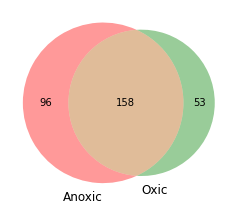

In [49]:
fig, ax = plt.subplots(figsize = (4,4))

venn2(subsets={'10': 96, '01': 53, '11': 158}, set_labels=('Anoxic', 'Oxic'));
ax.set
plt.savefig("venn_sg.png")  # Save the figure as a PNG (you can change the format as needed)


### Proteins of interest and presense/ absence visualization

In [50]:
prot_int_anox = ['EbN1_C03880','EbN1_C30340','EbN1_C30320','EbN1_C30310','EbN1_C30330',
                 'EbN1_C30400','EbN1_C30410','EbN1_C30420']



poi_anox = sg_anox_df[sg_anox_df["accession"].isin(prot_int_anox)]
poi_anox

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
5,EbN1_C03880,"hbrA benzoyl-CoA reductase, subunit A 424905:4...",32.490308,5.697525,1354.9,21,62.706271,1,0.075645
183,EbN1_C30310,"bcrC benzoyl-CoA reductase, subunit C 3135683:...",43.497624,5.376631,1182.7,22,63.324538,2,0.108755
184,EbN1_C30320,"bcrB benzoyl-CoA reductase, subunit B 3136851:...",49.822561,5.811562,1140.0,19,47.004608,1,0.121204
189,EbN1_C30400,"dch cyclohexa-1,5-dienecarbonyl-CoA hydratase ...",27.709692,5.463053,470.7,8,38.996139,2,0.170451
190,EbN1_C30410,had 6-hydroxycyclohex-1-ene-1-carbonyl-CoA deh...,38.357495,6.816576,547.9,9,32.394366,1,0.112969
191,EbN1_C30420,oah 6-oxocyclohex-1-ene-1-carbonyl-CoA hydrata...,41.667655,5.563384,790.7,14,46.010638,1,0.081256


In [51]:
prot_int_ox = ['EbN1_C15690','EbN1_C15680','EbN1_C15670','EbN1_C15650','EbN1_C17000']

poi_ox = sg_ox_df[sg_ox_df["accession"].isin(prot_int_ox)]
poi_ox

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
60,EbN1_C15650,"boxD 3,4-dehydroadipyl-CoA semialdehyde dehydr...",54.473268,5.912150,1057.5,18,47.428571,1,0.157417
61,EbN1_C15670,"boxC 2,3-epoxybenzoyl-CoA dihydrolase 1643583:...",61.179248,5.136635,1302.2,23,48.473968,1,0.124765
62,EbN1_C15680,"boxB benzoyl-CoA 2,3-epoxidase, beta subunit 1...",54.333900,5.552791,1540.0,24,52.431290,1,0.067406
63,EbN1_C15690,"boxA benzoyl-CoA 2,3-epoxidase, alpha subunit ...",45.959715,5.529409,304.3,5,12.740385,1,0.044418


In [52]:
poi_ox = sg_anox_df[sg_anox_df["accession"].isin(prot_int_ox)]
poi_ox

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
70,EbN1_C15650,"boxD 3,4-dehydroadipyl-CoA semialdehyde dehydr...",54.473268,5.912150,286.9,6,16.571429,1,0.097238
71,EbN1_C15670,"boxC 2,3-epoxybenzoyl-CoA dihydrolase 1643583:...",61.179248,5.136635,541.3,11,26.211849,1,0.066813
72,EbN1_C15680,"boxB benzoyl-CoA 2,3-epoxidase, beta subunit 1...",54.333900,5.552791,589.0,12,28.964059,1,0.043678
80,EbN1_C17000,gcdH glutaryl-CoA dehydrogenase (ETF) 1787289:...,43.335912,6.041761,547.8,12,44.556962,1,0.148804


### Make a list of total protein and check

In [53]:
protein = ['EbN1_C03880', 'EbN1_C30340', 'EbN1_C30320', 'EbN1_C30310', 'EbN1_C30330',
           'EbN1_C30400', 'EbN1_C30410', 'EbN1_C30420', 'EbN1_C15690', 'EbN1_C15680',
           'EbN1_C15670', 'EbN1_C15650', 'EbN1_C17000', 'EbN1_C36360','EbN1_C04870']


In [54]:
 sg_anox_df[sg_anox_df["accession"].isin(protein)]


,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
5,EbN1_C03880,"hbrA benzoyl-CoA reductase, subunit A 424905:4...",32.490308,5.697525,1354.9,21,62.706271,1,0.075645
13,EbN1_C04870,nirS nitrite reductase (NO-forming) 521065:522...,63.928540,7.792005,1682.2,29,52.768166,1,0.143891
70,EbN1_C15650,"boxD 3,4-dehydroadipyl-CoA semialdehyde dehydr...",54.473268,5.912150,286.9,6,16.571429,1,0.097238
71,EbN1_C15670,"boxC 2,3-epoxybenzoyl-CoA dihydrolase 1643583:...",61.179248,5.136635,541.3,11,26.211849,1,0.066813
72,EbN1_C15680,"boxB benzoyl-CoA 2,3-epoxidase, beta subunit 1...",54.333900,5.552791,589.0,12,28.964059,1,0.043678
80,EbN1_C17000,gcdH glutaryl-CoA dehydrogenase (ETF) 1787289:...,43.335912,6.041761,547.8,12,44.556962,1,0.148804
183,EbN1_C30310,"bcrC benzoyl-CoA reductase, subunit C 3135683:...",43.497624,5.376631,1182.7,22,63.324538,2,0.108755
184,EbN1_C30320,"bcrB benzoyl-CoA reductase, subunit B 3136851:...",49.822561,5.811562,1140.0,19,47.004608,1,0.121204
189,EbN1_C30400,"dch cyclohexa-1,5-dienecarbonyl-CoA hydratase ...",27.709692,5.463053,470.7,8,38.996139,2,0.170451
190,EbN1_C30410,had 6-hydroxycyclohex-1-ene-1-carbonyl-CoA deh...,38.357495,6.816576,547.9,9,32.394366,1,0.112969


In [55]:
 sg_ox_df[sg_ox_df["accession"].isin(protein)]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
60,EbN1_C15650,"boxD 3,4-dehydroadipyl-CoA semialdehyde dehydr...",54.473268,5.912150,1057.5,18,47.428571,1,0.157417
61,EbN1_C15670,"boxC 2,3-epoxybenzoyl-CoA dihydrolase 1643583:...",61.179248,5.136635,1302.2,23,48.473968,1,0.124765
62,EbN1_C15680,"boxB benzoyl-CoA 2,3-epoxidase, beta subunit 1...",54.333900,5.552791,1540.0,24,52.431290,1,0.067406
63,EbN1_C15690,"boxA benzoyl-CoA 2,3-epoxidase, alpha subunit ...",45.959715,5.529409,304.3,5,12.740385,1,0.044418


In [56]:
prot_name = ['hbrA', 'bcrA', 'bcrB', 'bcrC', 'bcrD',
             'dch', 'had', 'Oah','boxA', 'boxB', 
             'boxC', 'boxD', 'GcdH', 'narG', 'nirS']

protein = ['EbN1_C03880', 'EbN1_C30340', 'EbN1_C30320', 'EbN1_C30310', 'EbN1_C30330',
           'EbN1_C30400', 'EbN1_C30410', 'EbN1_C30420', 'EbN1_C15690', 'EbN1_C15680',
           'EbN1_C15670', 'EbN1_C15650', 'EbN1_C17000', 'EbN1_C36360','EbN1_C04870']

# Create a dictionary
protein_dict = dict(zip(prot_name, protein))


In [57]:
scores_anox = []
scores_ox = []

for prot_name in protein_dict.keys():
    protein_id = protein_dict[prot_name]
    
    if protein_id in sg_anox_df['accession'].values:
        score = sg_anox_df.loc[sg_anox_df['accession'] == protein_id]['scores'].values
        scores_anox.append(score)
    else:
        scores_anox.append(0)  # Append 0 if protein not found in anoxic data
    
    if protein_id in sg_ox_df['accession'].values:
        score_ox = sg_ox_df.loc[sg_ox_df['accession'] == protein_id]['scores'].values
        scores_ox.append(score_ox)
    else:
        scores_ox.append(0)  # Append 0 if protein not found in oxic data

# Convert the lists to numpy arrays for consistency
scores_anox = np.array(scores_anox,  dtype = "float")
scores_ox = np.array(scores_ox, dtype = "float")

print(scores_anox)
print(scores_ox)

[1354.9    0.  1140.  1182.7    0.   470.7  547.9  790.7    0.   589.
  541.3  286.9  547.8 1044.7 1682.2]
[   0.     0.     0.     0.     0.     0.     0.     0.   304.3 1540.
 1302.2 1057.5    0.     0.     0. ]


/var/folders/qb/h7cvtr2j3xgfb_ls8xftxjs00000gn/T/ipykernel_22239/2507990570.py:20: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  scores_anox = np.array(scores_anox,  dtype = "float")
/var/folders/qb/h7cvtr2j3xgfb_ls8xftxjs00000gn/T/ipykernel_22239/2507990570.py:21: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  scores_ox = np.array(scores_ox, dtype = "float")


In [58]:
df = pd.DataFrame({'Anox': scores_anox, 'Oxic': scores_ox}, index=protein_dict.keys())
df.head()

,Anox,Oxic
hbrA,1354.9,0.0
bcrA,0.0,0.0
bcrB,1140.0,0.0
bcrC,1182.7,0.0
bcrD,0.0,0.0


In [59]:
# Transpose the DataFrame
transposed_df = df.T
transposed_df

,hbrA,bcrA,bcrB,bcrC,bcrD,dch,had,Oah,boxA,boxB,boxC,boxD,GcdH,narG,nirS
Anox,1354.9,0.0,1140.0,1182.7,0.0,470.7,547.9,790.7,0.0,589.0,541.3,286.9,547.8,1044.7,1682.2
Oxic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,304.3,1540.0,1302.2,1057.5,0.0,0.0,0.0


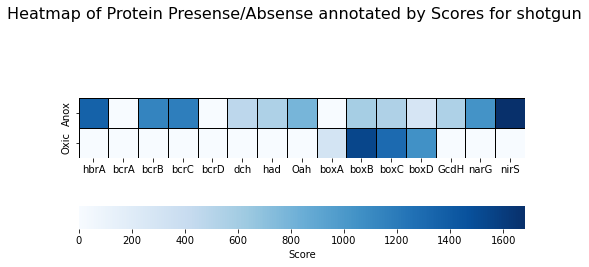

<Figure size 432x288 with 0 Axes>

In [60]:
# Create the custom colormap
#cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(transposed_df, annot=False, fmt=".1f", cmap="Blues", cbar_kws={'label': 'Score', 'orientation': 'horizontal'}, linewidth=.5, linecolor= "Black", square=True)
plt.suptitle('Heatmap of Protein Presense/Absense annotated by Scores for shotgun',  y=0.7, fontsize=16)
plt.show()
plt.savefig("heatmap shotgun.pdf")

### Protein Concentration determination 
#### Bradford Assay

In [61]:
df_bsa_brad = pd.read_excel('./Bradford_2023.xlsx', sheet_name='brad_bsa', header= 0)
df_bsa_brad[:2]

,BSA\nconcentration,A,B,C,Average,Average\n- blank,stdev,cv (%)
0,0,0.525,0.540,0.539,0.534667,0.000000,0.008386,1.568547
1,1,0.581,0.584,0.587,0.584000,0.049333,0.003000,0.513699


In [62]:
df_bsa_brad = df_bsa_brad.rename(columns = {"BSA\nconcentration":"bsa_nconc", "Average\n- blank":"avg_nblank" })
df_bsa_brad[:]

,bsa_nconc,A,B,C,Average,avg_nblank,stdev,cv (%)
0,0,0.525,0.540,0.539,0.534667,0.000000,0.008386,1.568547
1,1,0.581,0.584,0.587,0.584000,0.049333,0.003000,0.513699
2,2,0.624,0.621,0.621,0.622000,0.087333,0.001732,0.278465
3,4,0.701,0.711,0.708,0.706667,0.172000,0.005132,0.726170
4,6,0.808,0.809,0.815,0.810667,0.276000,0.003786,0.467015
5,8,0.833,0.829,0.841,0.834333,0.299667,0.006110,0.732333
6,10,0.910,0.907,0.902,0.906333,0.371667,0.004041,0.445912


In [63]:
df_sample_brad=  pd.read_excel('./Bradford_2023.xlsx', sheet_name='brad_grp_2', header= 0)
df_sample_brad[:2]

,sample\ndilution\nconcentration,A,B,C,Average,Average\n- blank,stdev,cv (%)
0,0,0.541,0.544,0.546,0.543667,0.000000,0.002517,0.462896
1,1000,0.622,0.588,0.599,0.603000,0.059333,0.017349,2.877173


In [64]:
df_sample_brad = df_sample_brad.rename(columns = {"sample\ndilution\nconcentration":"sample_ndil", "Average\n- blank":"avg_nblank" })
df_sample_brad

,sample_ndil,A,B,C,Average,avg_nblank,stdev,cv (%)
0,0,0.541,0.544,0.546,0.543667,0.000000,0.002517,0.462896
1,1000,0.622,0.588,0.599,0.603000,0.059333,0.017349,2.877173
2,2000,0.568,0.573,0.578,0.573000,0.029333,0.005000,0.872600
3,4000,0.559,0.553,0.560,0.557333,0.013667,0.003786,0.679295
4,8000,0.549,0.552,0.542,0.547667,0.004000,0.005132,0.936994


#### RC_DC

In [65]:
df_bsa = pd.read_excel('./RCDC_2023.xlsx', sheet_name='group_2_bsa', header= 1)
df_bsa[:2]

,BSA\nconcentration,A,B,C,Average,Average\n- blank,stdev,cv (%)
0,0,0.108,0.106,0.104,0.106000,0.000000,0.002000,1.886792
1,100,0.137,0.134,0.132,0.134333,0.028333,0.002517,1.873408


In [66]:
df_bsa = df_bsa.rename(columns = {"BSA\nconcentration":"bsa_nconc", "Average":"avg", "Average\n- blank":"avg_nblank" })
df_bsa[:]

,bsa_nconc,A,B,C,avg,avg_nblank,stdev,cv (%)
0,0,0.108,0.106,0.104,0.106000,0.000000,0.002000,1.886792
1,100,0.137,0.134,0.132,0.134333,0.028333,0.002517,1.873408
2,250,0.175,0.182,0.182,0.179667,0.073667,0.004041,2.249417
3,500,0.283,0.292,0.275,0.283333,0.177333,0.008505,3.001730
4,750,0.349,0.347,0.366,0.354000,0.248000,0.010440,2.949239
5,1000,0.385,0.409,0.418,0.404000,0.298000,0.017059,4.222456
6,1200,0.469,0.424,0.461,0.451333,0.345333,0.024007,5.319116


In [67]:
df_sample_rc = pd.read_excel('./RCDC_2023.xlsx', sheet_name='grp_2_conc', header= 1)
df_sample_rc[:1]

,sample\ndilution\nconcentration,A,B,C,Average,Average\n- blank,stdev,cv (%)
0,0,0.106,0.104,0.104,0.104667,0.0,0.001155,1.103217


In [68]:
df_sample_rc = df_sample_rc.rename(columns = {"sample\ndilution\nconcentration":"sample_ndil", "Average\n- blank":"avg_nblank" })
df_sample_rc[:]

,sample_ndil,A,B,C,Average,avg_nblank,stdev,cv (%)
0,0,0.106,0.104,0.104,0.104667,0.000000,0.001155,1.103217
1,10,0.183,0.190,0.183,0.185333,0.080667,0.004041,2.180640
2,15,0.160,0.160,0.158,0.159333,0.054667,0.001155,0.724707
3,20,0.143,0.148,0.146,0.145667,0.041000,0.002517,1.727651


### PLot regression lines for both standard 

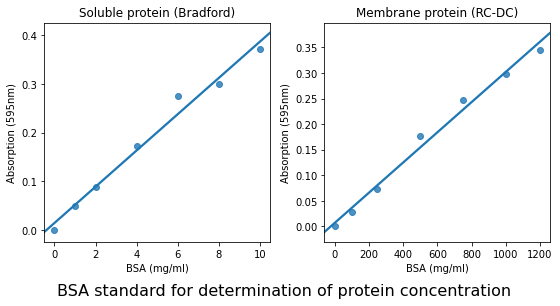

In [72]:
# Create subplots with two axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first regression line
sns.regplot(x='bsa_nconc', y='avg_nblank', data=df_bsa_brad, ci=None, ax=ax1, fit_reg=True, truncate=False)
ax1.set_xlabel('BSA (mg/ml)')
ax1.set_ylabel('Absorption (595nm)')
ax1.set_title('Soluble protein (Bradford)')

# Plot the second regression line
sns.regplot(x='bsa_nconc', y='avg_nblank', data=df_bsa, ci=None, ax=ax2, fit_reg=True, truncate=False)
ax2.set_xlabel('BSA (mg/ml)')
ax2.set_ylabel('Absorption (595nm)')
ax2.set_title('Membrane protein (RC-DC)')

# Adjust layout
plt.tight_layout()

plt.suptitle('BSA standard for determination of protein concentration', y=0, fontsize=16)

# Show the plots
plt.show()


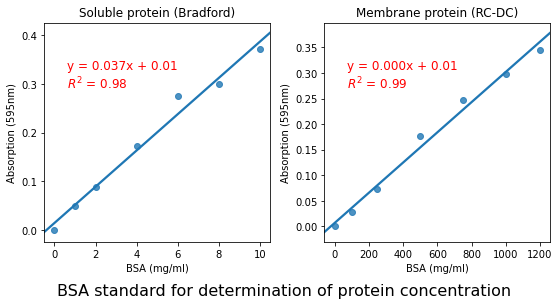

In [80]:
# Perform linear regression

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Your DataFrame (df_bsa_brad and df_bsa)

# Create subplots with two axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first regression line
sns.regplot(x='bsa_nconc', y='avg_nblank', data=df_bsa_brad, ci=None, ax=ax1, fit_reg=True, truncate=False)
ax1.set_xlabel('BSA (mg/ml)')
ax1.set_ylabel('Absorption (595nm)')
ax1.set_title('Soluble protein (Bradford)')

# Calculate regression statistics for the first plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df_bsa_brad['bsa_nconc'], df_bsa_brad['avg_nblank'])
reg_eq = f'y = {slope:.3f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}'
ax1.annotate(reg_eq, xy=(0.1, 0.7), xycoords='axes fraction', fontsize=12, color='red')

# Plot the second regression line
sns.regplot(x='bsa_nconc', y='avg_nblank', data=df_bsa, ci=None, ax=ax2, fit_reg=True, truncate=False)
ax2.set_xlabel('BSA (mg/ml)')
ax2.set_ylabel('Absorption (595nm)')
ax2.set_title('Membrane protein (RC-DC)')

# Calculate regression statistics for the second plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df_bsa['bsa_nconc'], df_bsa['avg_nblank'])
reg_eq = f'y = {slope:.3f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}'
ax2.annotate(reg_eq, xy=(0.1, 0.7), xycoords='axes fraction', fontsize=12, color='red')

# Adjust layout
plt.tight_layout()

plt.suptitle('BSA standard for determination of protein concentration', y=0, fontsize=16)

# Show the plots
plt.show()


In [ ]:
anox = anox_specific
ox = oxic_specific

In [ ]:


# Assuming you have two dataframes: gel_slice_anox and gel_slice_ox
selected_cols = ["scores", "#peptides", "sc [%]", "mw [kda]"]
anox = anox[selected_cols]
ox = ox[selected_cols]

# Add a 'Condition' column to each dataframe
anox["Condition"] = "Anoxic"
ox["Condition"] = "Oxic"

# Concatenate the two dataframes
combined_data = pd.concat([anox, ox], ignore_index=True)

# Create a grouped box plot using Seaborn with a smaller width
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(x='Condition', y='value', hue='variable', data=pd.melt(combined_data, id_vars=['Condition']), width=0.4)

# Set labels and title
plt.xlabel('Growth Condition')
plt.ylabel('Values')
plt.title('Comparison of Data Distribution')

# Show the plot
plt.show()
